Lang Tuang | IS 362 | Week8 Assignment | 10/16/2021

0. import necessary methods as usual.

In [37]:
import numpy as num
import pandas as pan
import seaborn as sea
from matplotlib import pyplot as plt
%matplotlib inline

1. Load "auto-mpg.data" into Pandas DataFrame.
Direct link to dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Direct link to data description: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

In [11]:
autompg = pan.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')


2. Review data and provided data set description.

In [12]:
autompg.head(10)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...
6,14.0 8 440.0 215.0 4312. 8...
7,14.0 8 455.0 225.0 4425. 10...
8,15.0 8 390.0 190.0 3850. 8...
9,15.0 8 383.0 170.0 3563. 10...


3. Use attribute information provided in auto-mpg.names .. to name your pandas DataFram columns.
 Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [14]:
column_name = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin','Car Name']

In [21]:
autompg = pan.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', names = column_name )

In [22]:
autompg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0 8 307.0 130.0 3504. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.1 Data cleaning: "delim_whitespace: specifies whether or not whitespace (e.g.  '' or '   ') will be used as the seperator."
Equivalent to setting sep='\s+'.
If this option is set to "True", nothing should be passed in for the delimiter parameter.

In [24]:
autompg = pan.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace = True, names = column_name )

In [30]:
autompg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


4. Some horsepower data marked as '?', replace with "Pandas appropriate missing value", then convert column to numeric.
 Missing Attribute Values:  horsepower has 6 missing values

In [32]:
autompg.replace('?', num.nan, inplace=True)
autompg['Horsepower'] = autompg['Horsepower'].astype(float)

4.1 Check the updated data type for "Horsepower Column"

In [33]:
autompg.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

5. Origin column values are 1,2,3. Convert to 'USA', 'Asia', 'Europe'.

In [35]:
autompg['Origin'].replace(1,'USA',inplace=True)
autompg['Origin'].replace(2,'Asia',inplace=True)
autompg['Origin'].replace(3,'Europe',inplace=True)

5.1 Check the updated data on "Origin Column"

In [39]:
autompg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


6. Create a bar chart that shows "distribution for cylinders".
The chart show the distribution of cylinders based on origin.

<AxesSubplot:xlabel='Cylinders', ylabel='Origin'>

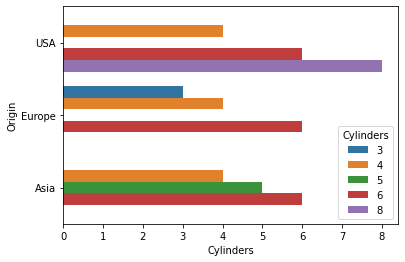

In [47]:
sea.barplot(data = autompg,x = 'Cylinders', y = 'Origin', hue= 'Cylinders')

7. Create scatterplot that shows "relationship between horsepower and weight".
Testing "Car Name" for hue wasn't a good idea, the plot below show the relationship betwwen horsepower and weight with hue as MPG.

<AxesSubplot:xlabel='Horsepower', ylabel='Weight'>

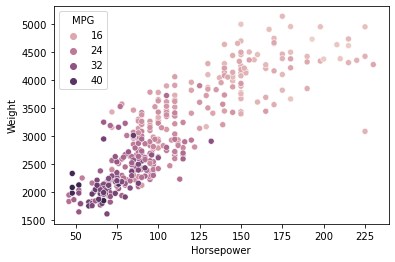

In [52]:
sea.scatterplot(data = autompg, x = 'Horsepower', y = 'Weight' , hue = 'MPG' )

8. Ask and Answer (using MatPlotLib & SeaBorn) question about distribution of one of the variables OR relationship between (two or more) of the variables in the dataset.
Create an animation version of the question above, the relationship between horsepower and weight.
Ref: https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1
Ref: https://seaborn.pydata.org/examples/index.html

<IPython.core.display.Javascript object>


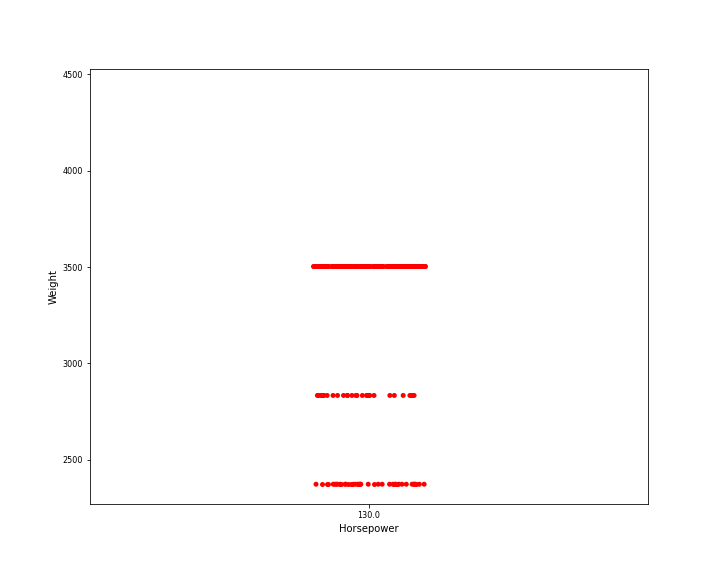

In [120]:
%matplotlib inline
%matplotlib notebook
import matplotlib
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,8))
def animate(i):
    data = autompg.iloc[:int(i+1)] #select data range
    p = sea.stripplot( x='Horsepower', y='Weight',  data= data, color="r")
    p.tick_params(labelsize=8)
    plt.setp(p.lines,linewidth=3)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
plt.show()